In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt
import numpy as np

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 17s 291us/step - loss: 0.2212 - acc: 0.9345
Epoch 2/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0980 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0694 - acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.0537 - acc: 0.9830
Epoch 5/5
10000/10000 [==============================] - 1s 52us/step


[0.06575950870180386, 0.9802]

In [3]:
print(tf.__version__)

1.10.1


In [4]:
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_lab), (test_img, test_lab) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_img.shape)

(60000, 28, 28)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


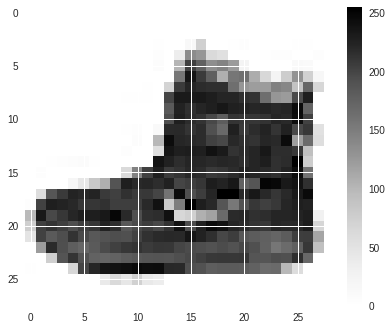

In [7]:
plt.imshow(train_img[0])
plt.colorbar()

In [0]:
train_img = train_img/255.0
test_img=test_img/255.0

In [0]:
model=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
model.fit(train_img, train_lab, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.5004 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.3736 - acc: 0.8666
Epoch 3/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3364 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.3129 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2944 - acc: 0.8899


In [13]:
model_loss, test_acc = model.evaluate(test_img, test_lab)

10000/10000 [==============================] - 0s 25us/step


In [14]:
print(test_acc)

0.8758


In [0]:
prd = model.predict(test_img)

In [28]:
print(prd[1])

[3.19879327e-05 5.95054006e-11 9.75074291e-01 2.04695425e-07
 1.22284442e-02 1.23967703e-09 1.26647055e-02 4.92276088e-13
 2.91289012e-07 6.13428240e-14]


In [0]:
def predict_ele(i):
  prd_lab = np.argmax(prd[i])
  print(prd_lab, test_lab[i])
  if prd_lab!=test_lab[i]:
    print("XXXX")
  
  print("The image is -> ", class_names[prd_lab])
  plt.grid(False)
  plt.imshow(test_img[i])

9 9
The image is ->  Ankle boot
2 2
The image is ->  Pullover
1 1
The image is ->  Trouser
1 1
The image is ->  Trouser
6 6
The image is ->  Shirt
1 1
The image is ->  Trouser
4 4
The image is ->  Coat
6 6
The image is ->  Shirt
5 5
The image is ->  Sandal
7 7
The image is ->  Sneaker


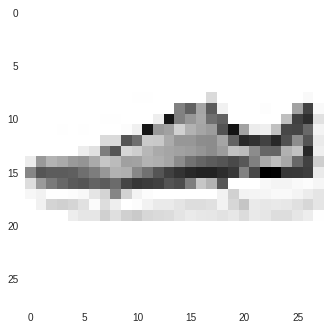

In [53]:
for i in range(len(class_names)):
  predict_ele(i)